In [75]:
import pandas as pd
import seaborn as sns

In [76]:
BTCUSD=pd.read_csv('BTCBUSD-1m-2023/BTCBUSD-1m-2023-01.csv')

In [77]:
BTCUSD.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1672531200000,16530.2,16530.2,16530.1,16530.2,29.471,1672531259999,487159.8859,158,13.088,216347.2576,0
1,1672531260000,16530.2,16530.2,16530.1,16530.1,4.435,1672531319999,73311.3015,66,3.080,50913.0160,0
2,1672531320000,16530.1,16530.2,16527.2,16527.2,13.733,1672531379999,226997.9099,121,5.053,83527.1006,0
3,1672531380000,16527.2,16527.3,16523.0,16523.0,33.656,1672531439999,556172.1478,197,5.455,90141.7635,0
4,1672531440000,16523.1,16523.6,16521.3,16523.6,17.583,1672531499999,290505.4636,170,13.804,228068.0151,0


In [78]:
BTCUSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               44640 non-null  int64  
 1   open                    44640 non-null  float64
 2   high                    44640 non-null  float64
 3   low                     44640 non-null  float64
 4   close                   44640 non-null  float64
 5   volume                  44640 non-null  float64
 6   close_time              44640 non-null  int64  
 7   quote_volume            44640 non-null  float64
 8   count                   44640 non-null  int64  
 9   taker_buy_volume        44640 non-null  float64
 10  taker_buy_quote_volume  44640 non-null  float64
 11  ignore                  44640 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 4.1 MB


In [79]:
BTCUSDT=pd.read_csv('BTCUSDT-1m-2023/BTCUSDT-1m-2023-01.csv')

In [80]:
BTCUSDT.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1672531200000,16537.5,16538.0,16534.3,16538.0,170.576,1672531259999,2.820697e+06,946,103.782,1.716165e+06,0
1,1672531260000,16538.0,16538.0,16534.9,16534.9,44.287,1672531319999,7.323633e+05,570,19.098,3.158178e+05,0
2,1672531320000,16534.9,16535.0,16531.3,16531.4,100.228,1672531379999,1.657072e+06,456,21.026,3.476265e+05,0
3,1672531380000,16531.4,16531.4,16526.6,16526.9,317.879,1672531439999,5.254048e+06,980,79.937,1.321185e+06,0
4,1672531440000,16527.0,16529.3,16523.0,16529.2,211.281,1672531499999,3.491635e+06,1113,79.049,1.306280e+06,0


In [81]:
merged_df=BTCUSD.merge(BTCUSDT,on="close_time",how="left")

In [82]:
price_BTCUSD=merged_df['close_x']
price_BTCUSDT=merged_df['close_y']

In [83]:
merged_df['spread_returns_prev']=[(max(i,j)-min(i,j))/min(i,j) for i,j in zip(price_BTCUSD,price_BTCUSDT)]

In [84]:
merged_df['spread_returns_1day_prev']=merged_df['spread_returns_prev'].shift(-119)

In [85]:
merged_df['spread_returns']=merged_df['spread_returns_prev'].shift(-120)

In [86]:
merged_df.head()

,open_time_x,open_x,high_x,low_x,close_x,volume_x,close_time,quote_volume_x,count_x,taker_buy_volume_x,...,close_y,volume_y,quote_volume_y,count_y,taker_buy_volume_y,taker_buy_quote_volume_y,ignore_y,spread_returns_prev,spread_returns_1day_prev,spread_returns
0,1672531200000,16530.2,16530.2,16530.1,16530.2,29.471,1672531259999,487159.8859,158,13.088,...,16538.0,170.576,2.820697e+06,946,103.782,1.716165e+06,0,0.000472,0.000381,0.000278
1,1672531260000,16530.2,16530.2,16530.1,16530.1,4.435,1672531319999,73311.3015,66,3.080,...,16534.9,44.287,7.323633e+05,570,19.098,3.158178e+05,0,0.000290,0.000278,0.000447
2,1672531320000,16530.1,16530.2,16527.2,16527.2,13.733,1672531379999,226997.9099,121,5.053,...,16531.4,100.228,1.657072e+06,456,21.026,3.476265e+05,0,0.000254,0.000447,0.000393
3,1672531380000,16527.2,16527.3,16523.0,16523.0,33.656,1672531439999,556172.1478,197,5.455,...,16526.9,317.879,5.254048e+06,980,79.937,1.321185e+06,0,0.000236,0.000393,0.000224
4,1672531440000,16523.1,16523.6,16521.3,16523.6,17.583,1672531499999,290505.4636,170,13.804,...,16529.2,211.281,3.491635e+06,1113,79.049,1.306280e+06,0,0.000339,0.000224,0.000224


In [87]:
merged_df.dropna(inplace=True)

In [88]:
merged_df.isnull().sum()

open_time_x                 0
open_x                      0
high_x                      0
low_x                       0
close_x                     0
volume_x                    0
close_time                  0
quote_volume_x              0
count_x                     0
taker_buy_volume_x          0
taker_buy_quote_volume_x    0
ignore_x                    0
open_time_y                 0
open_y                      0
high_y                      0
low_y                       0
close_y                     0
volume_y                    0
quote_volume_y              0
count_y                     0
taker_buy_volume_y          0
taker_buy_quote_volume_y    0
ignore_y                    0
spread_returns_prev         0
spread_returns_1day_prev    0
spread_returns              0
dtype: int64

In [89]:
merged_df=merged_df.drop(columns=['open_time_x','open_time_y','close_x','close_y','ignore_x','ignore_y','open_x','open_y','spread_returns_prev'])

In [90]:
merged_df.head()

,high_x,low_x,volume_x,close_time,quote_volume_x,count_x,taker_buy_volume_x,taker_buy_quote_volume_x,high_y,low_y,volume_y,quote_volume_y,count_y,taker_buy_volume_y,taker_buy_quote_volume_y,spread_returns_1day_prev,spread_returns
0,16530.2,16530.1,29.471,1672531259999,487159.8859,158,13.088,216347.2576,16538.0,16534.3,170.576,2.820697e+06,946,103.782,1.716165e+06,0.000381,0.000278
1,16530.2,16530.1,4.435,1672531319999,73311.3015,66,3.080,50913.0160,16538.0,16534.9,44.287,7.323633e+05,570,19.098,3.158178e+05,0.000278,0.000447
2,16530.2,16527.2,13.733,1672531379999,226997.9099,121,5.053,83527.1006,16535.0,16531.3,100.228,1.657072e+06,456,21.026,3.476265e+05,0.000447,0.000393
3,16527.3,16523.0,33.656,1672531439999,556172.1478,197,5.455,90141.7635,16531.4,16526.6,317.879,5.254048e+06,980,79.937,1.321185e+06,0.000393,0.000224
4,16523.6,16521.3,17.583,1672531499999,290505.4636,170,13.804,228068.0151,16529.3,16523.0,211.281,3.491635e+06,1113,79.049,1.306280e+06,0.000224,0.000224


<AxesSubplot:>

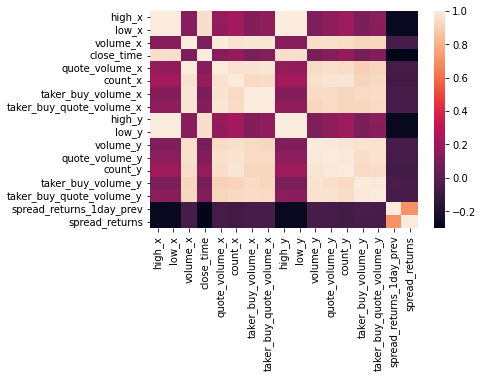

In [91]:
sns.heatmap(merged_df.corr())

In [92]:
features=merged_df.drop(columns=['spread_returns'],axis=1).columns
X=merged_df[features]
# X=features
y=merged_df['spread_returns']

In [93]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : int, default=100
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : {"mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared er

In [95]:
clf = RandomForestRegressor(n_estimators=300, criterion='mse',  max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)

In [ ]:
model_res.score(X_train,y_train)

In [ ]:
model_res.score(X_test,y_test)

In [99]:
y_pred=model_res.predict(X_test)

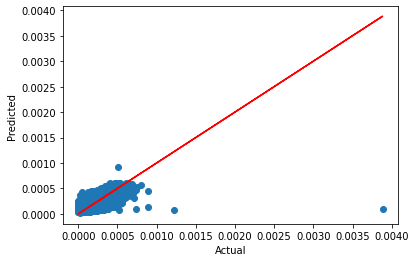

In [103]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
a=y_test
p=y_test
plt.plot(a,p,c='r')
# Label it nicely
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()